In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

- Dataset : https://archive.ics.uci.edu/dataset/94/spambase
- Drive link: https://drive.google.com/drive/folders/1KeVl3pv5PSoROpZFlIEgFW7mfoGMQ13A?usp=sharing

In [ ]:
cols = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'class'
]
df = pd.read_csv('/content/drive/MyDrive/new ML-DL/spambase/spambase.data',names=cols )

df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
df['class']

,class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


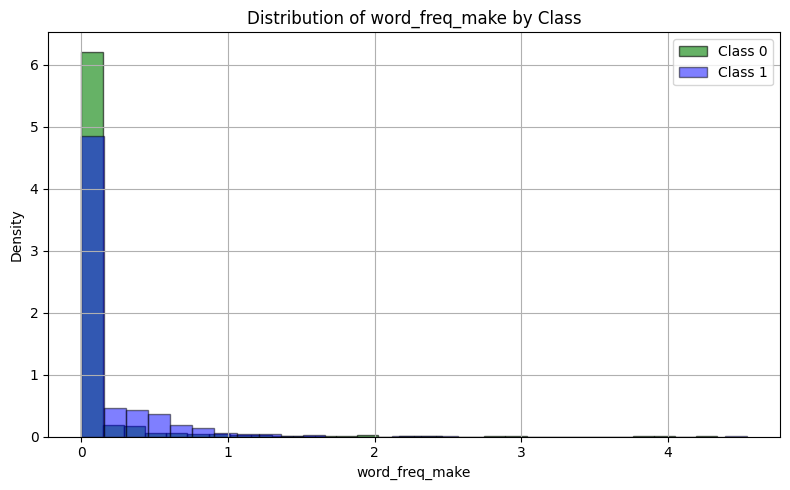

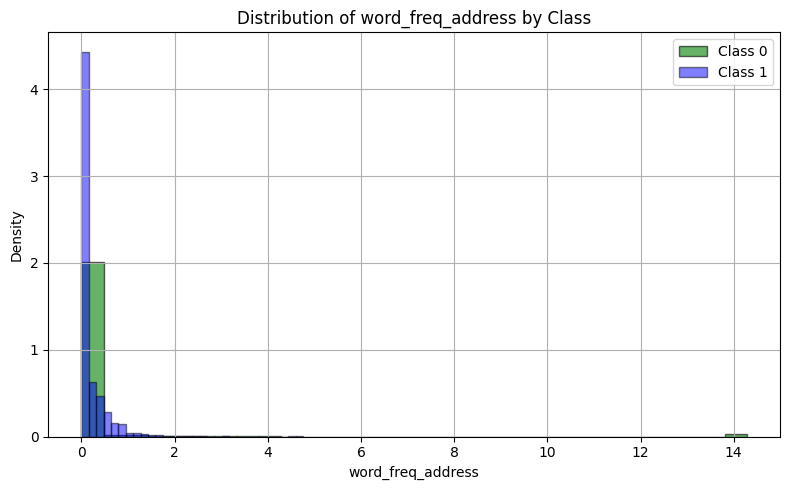

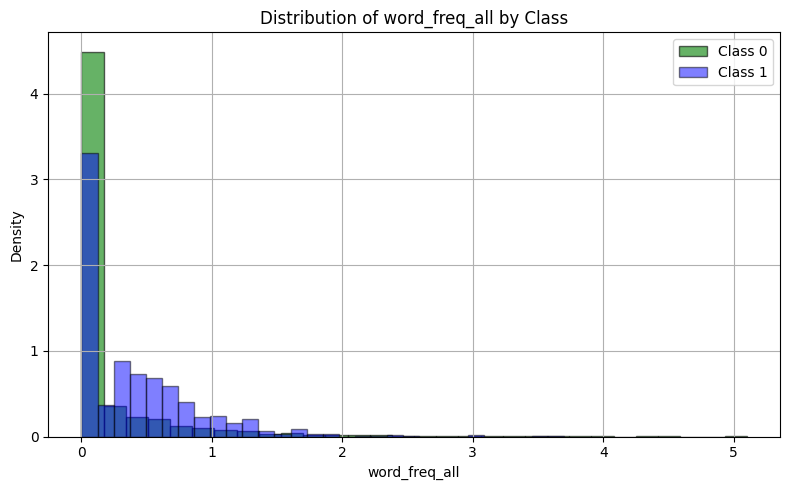

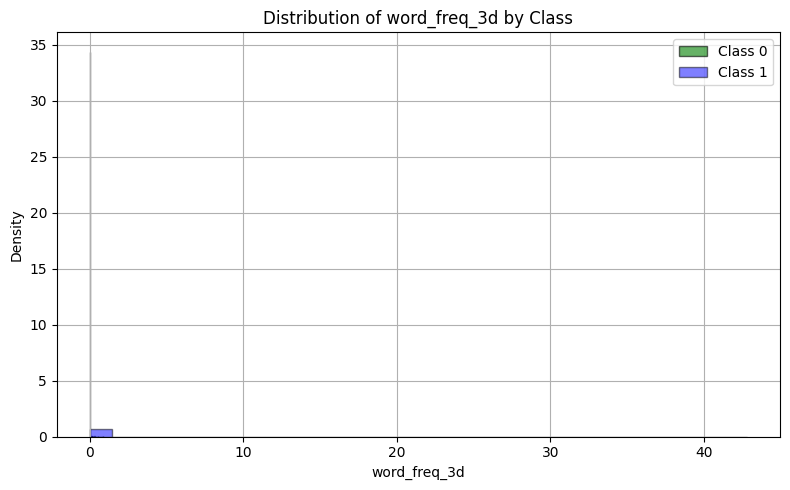

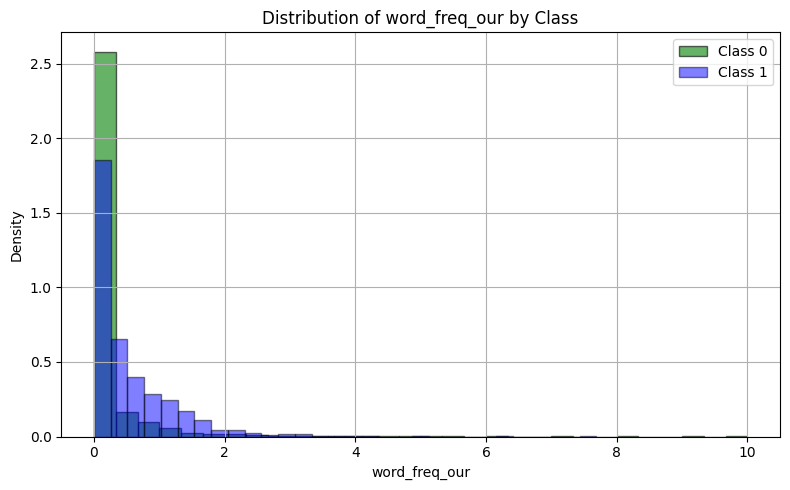

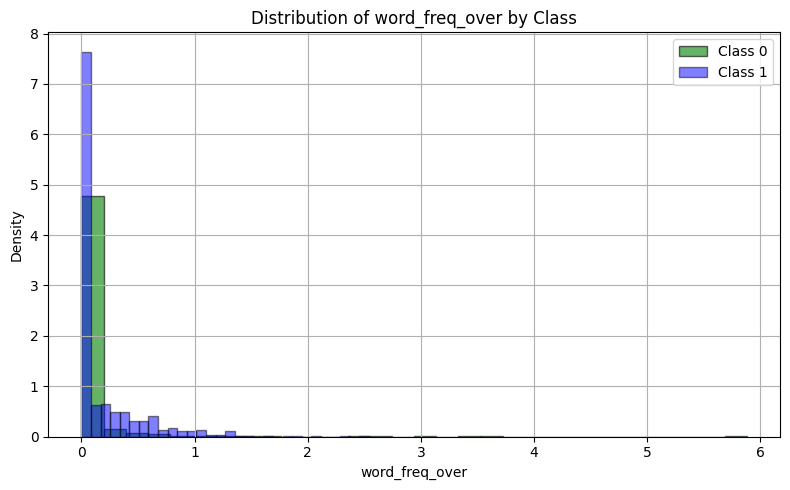

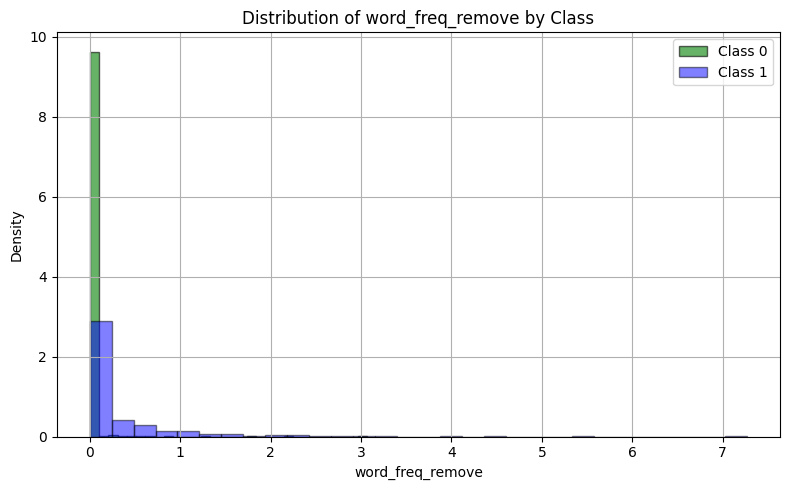

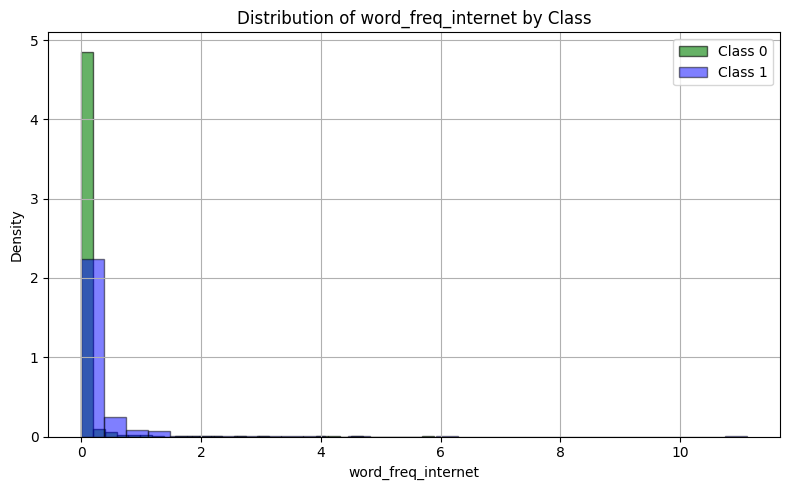

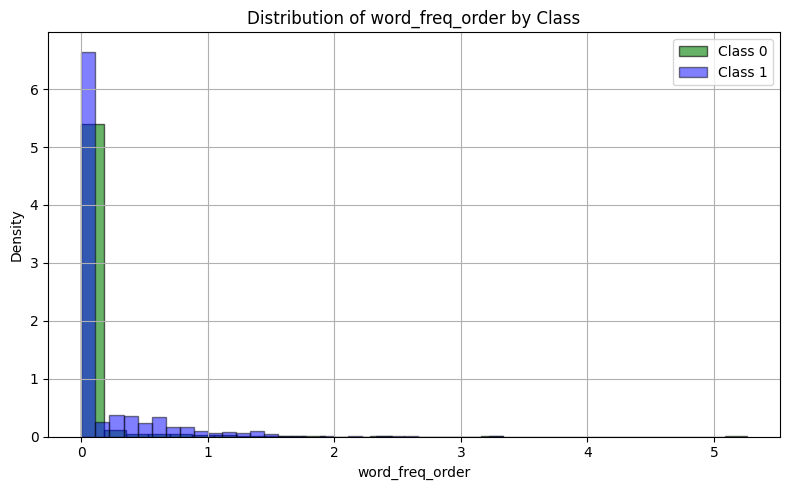

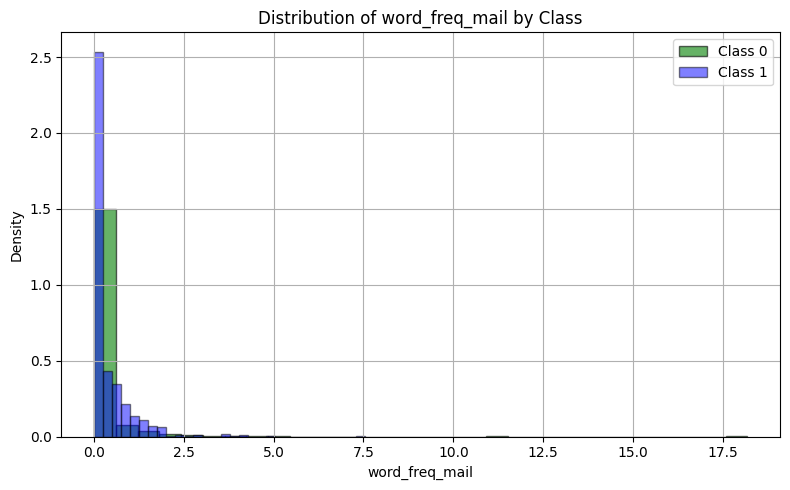

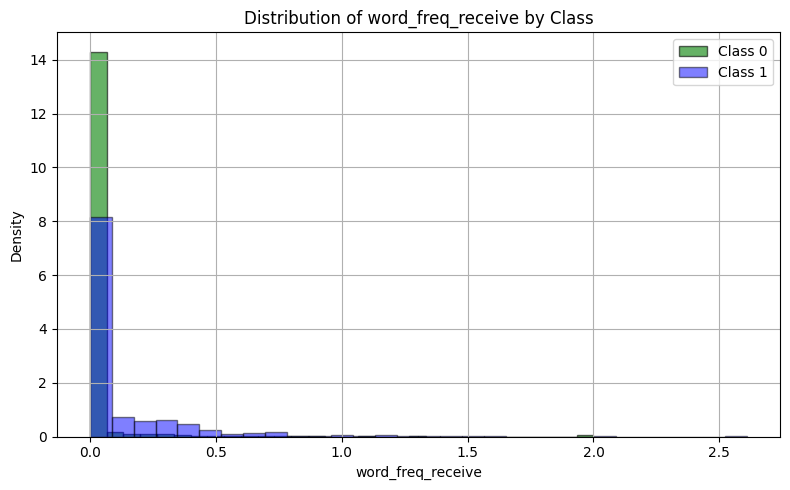

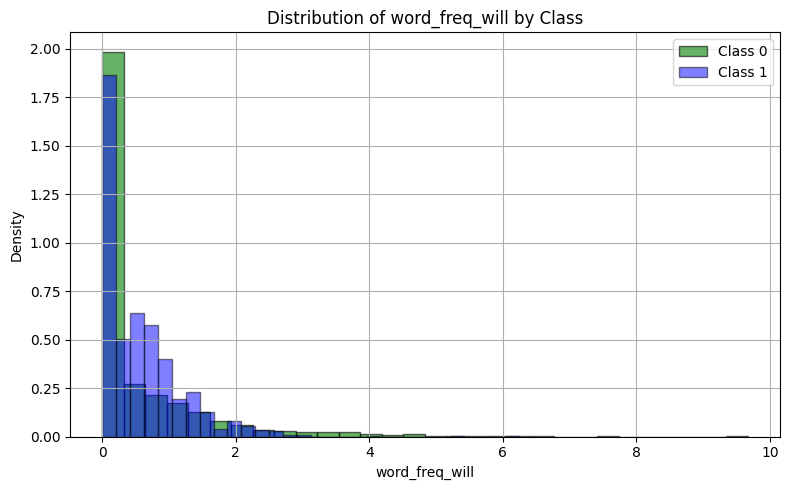

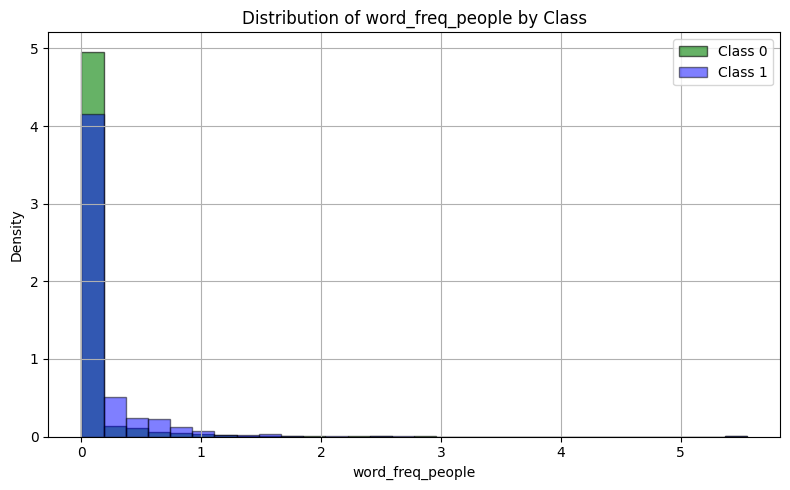

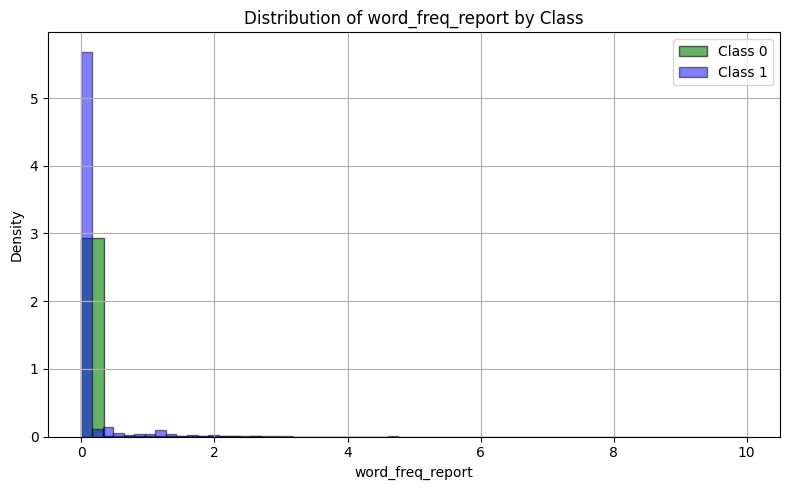

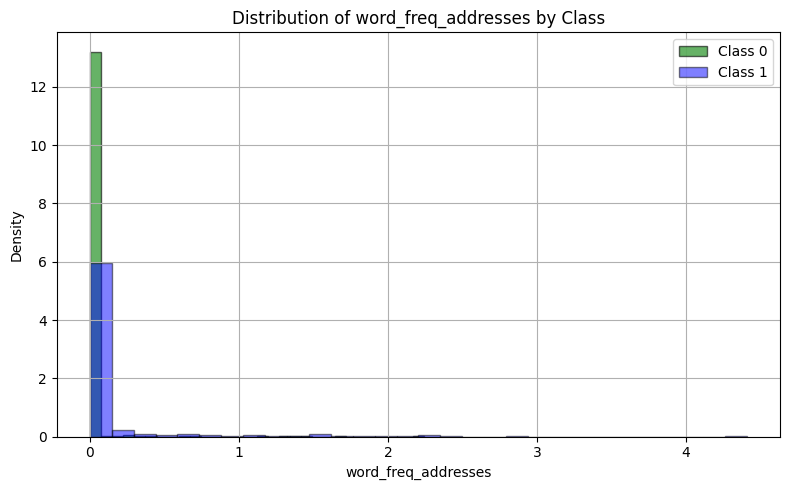

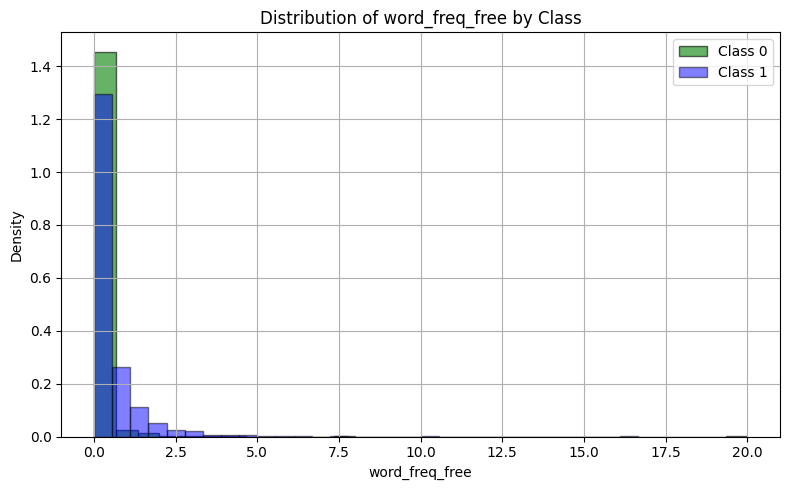

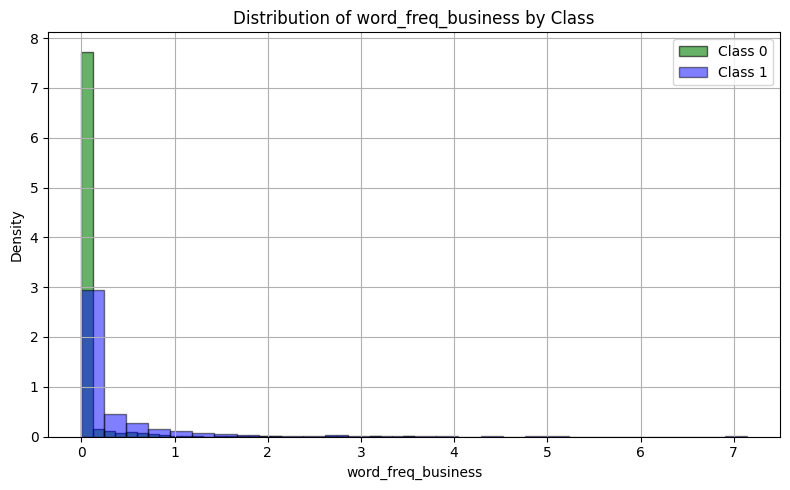

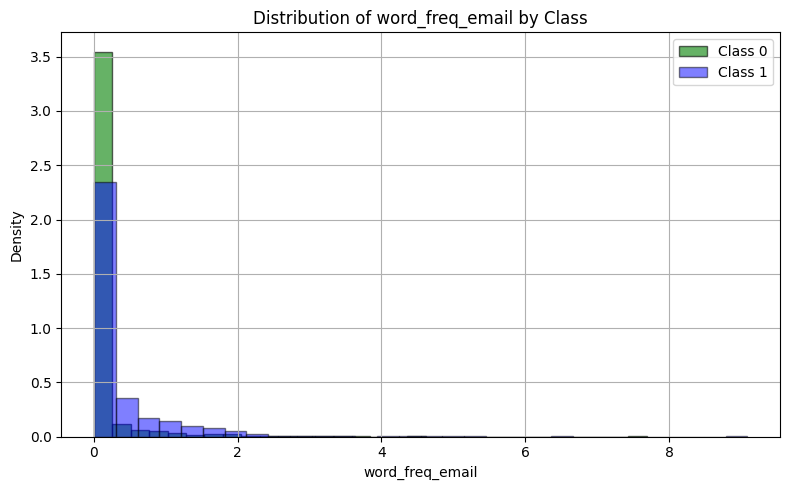

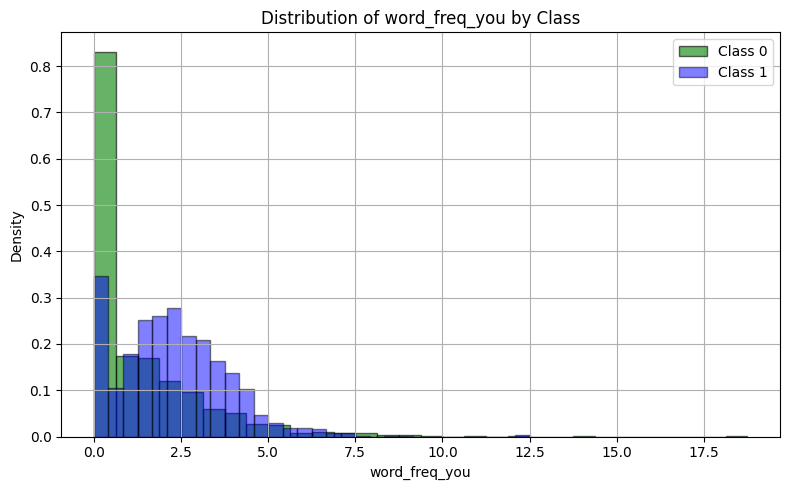

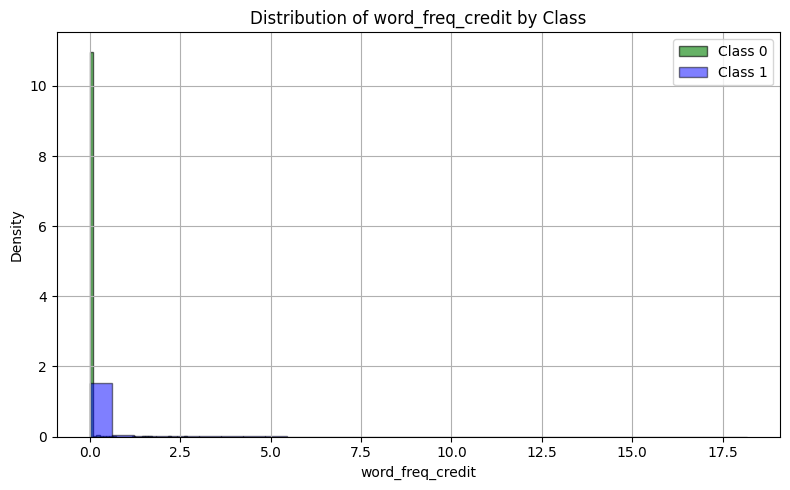

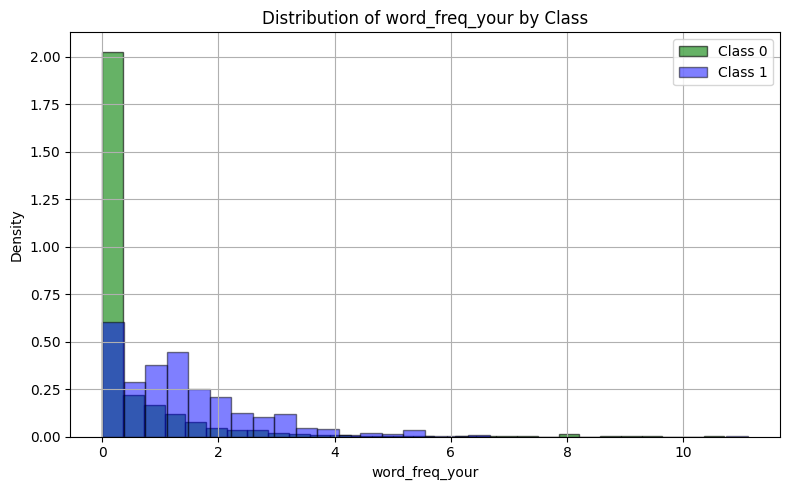

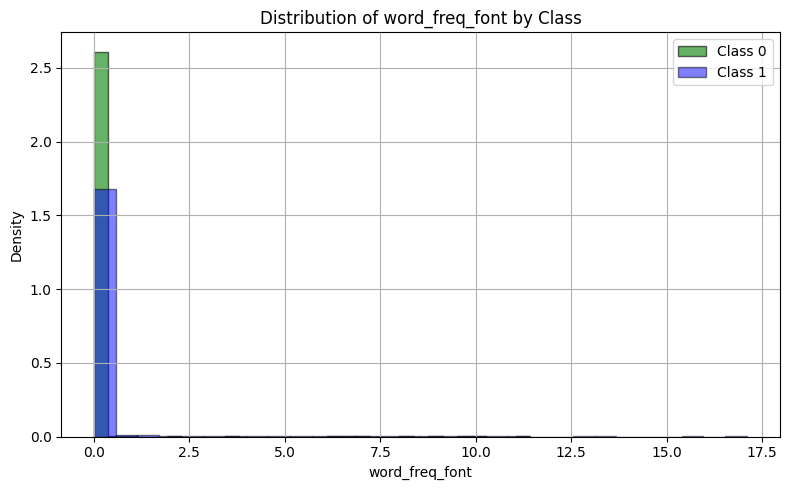

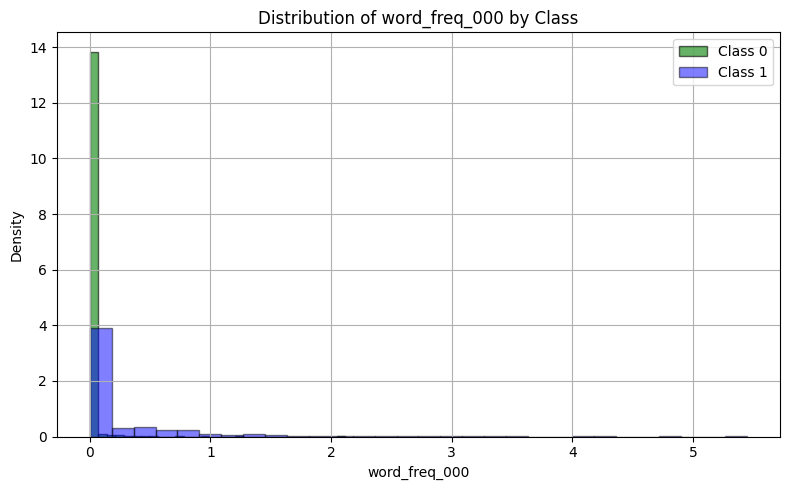

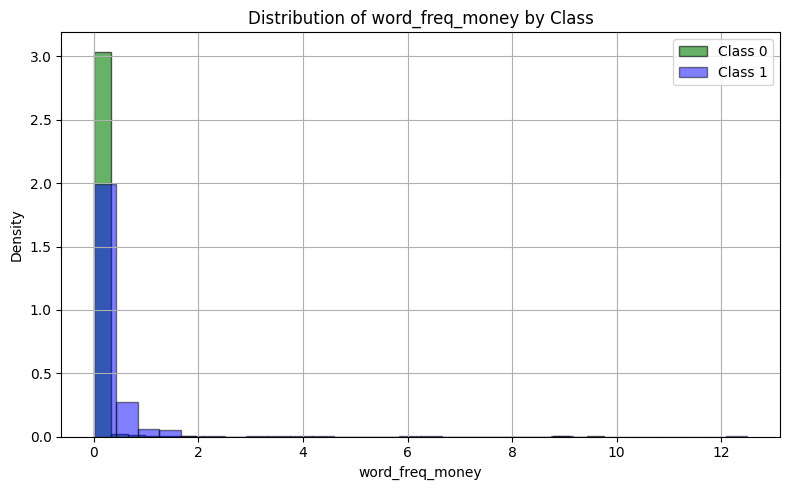

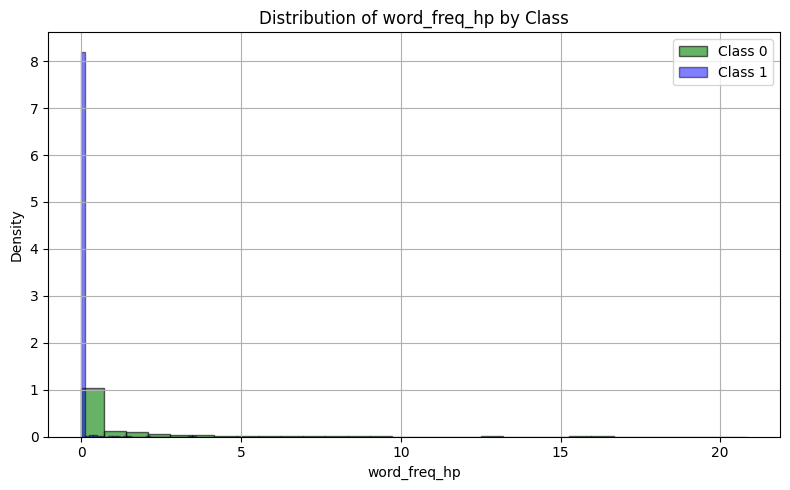

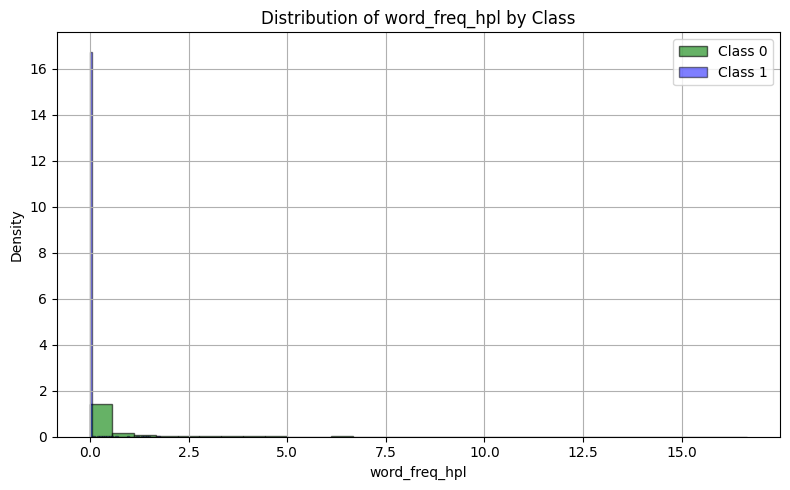

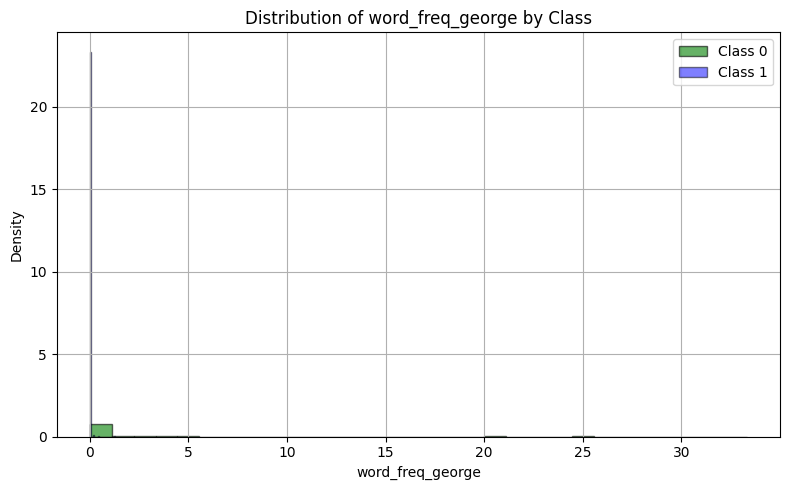

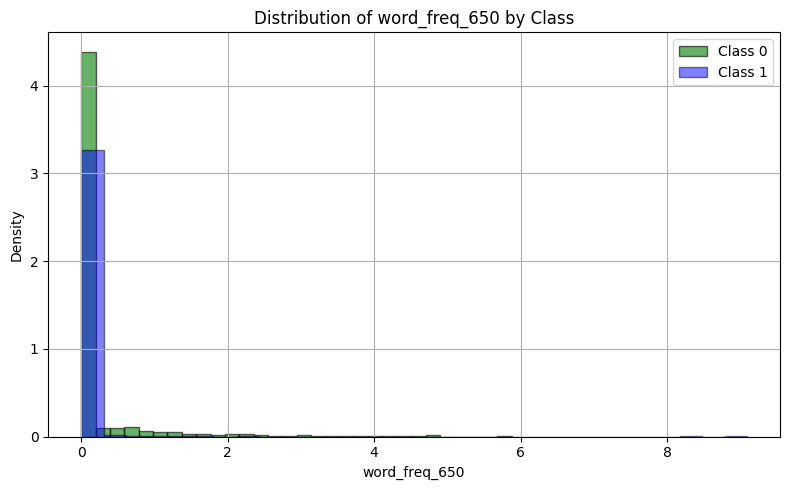

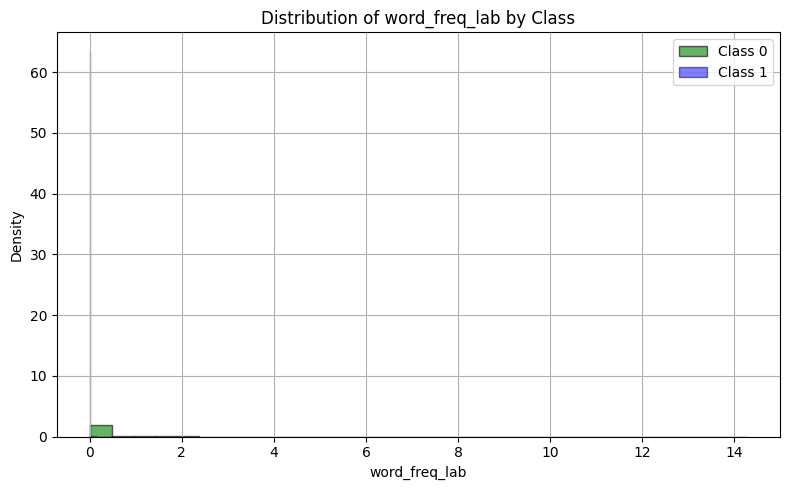

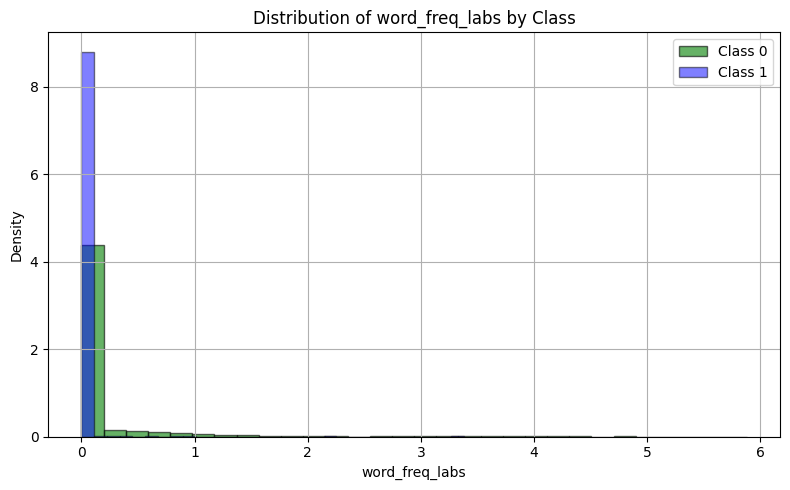

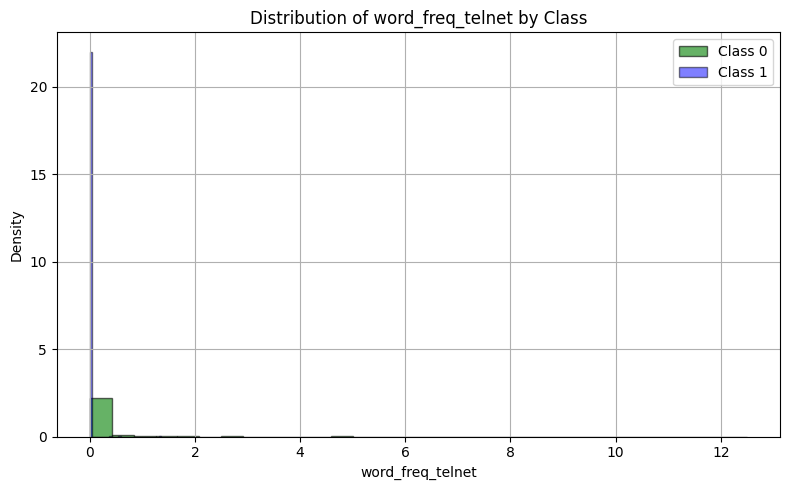

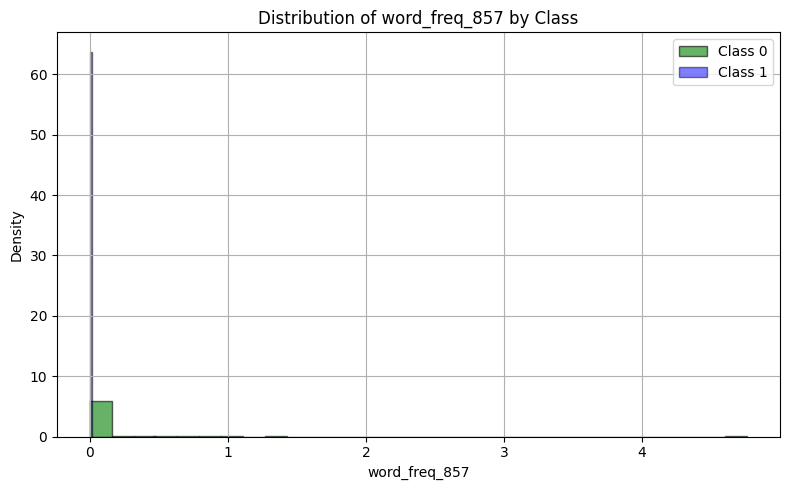

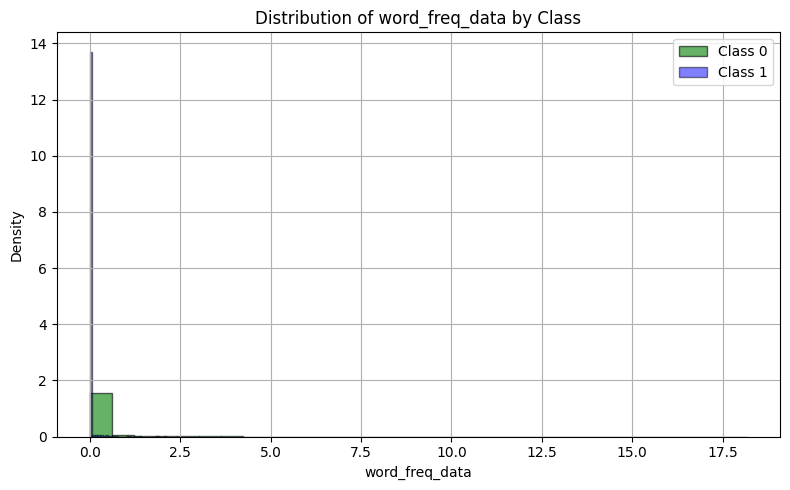

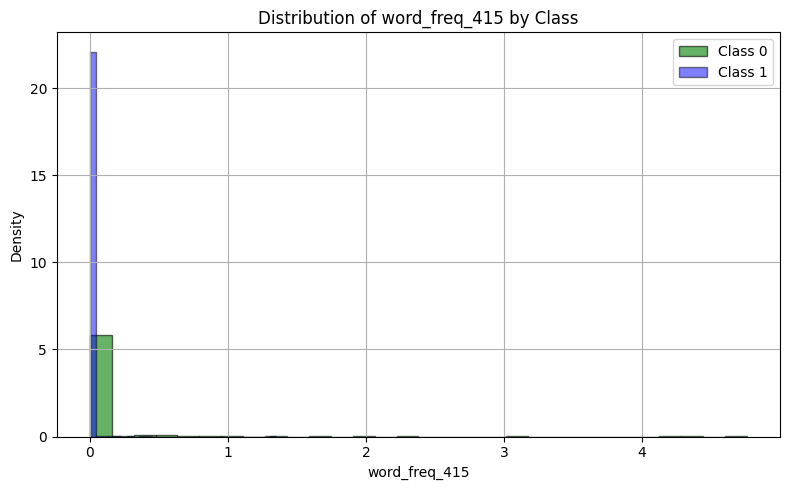

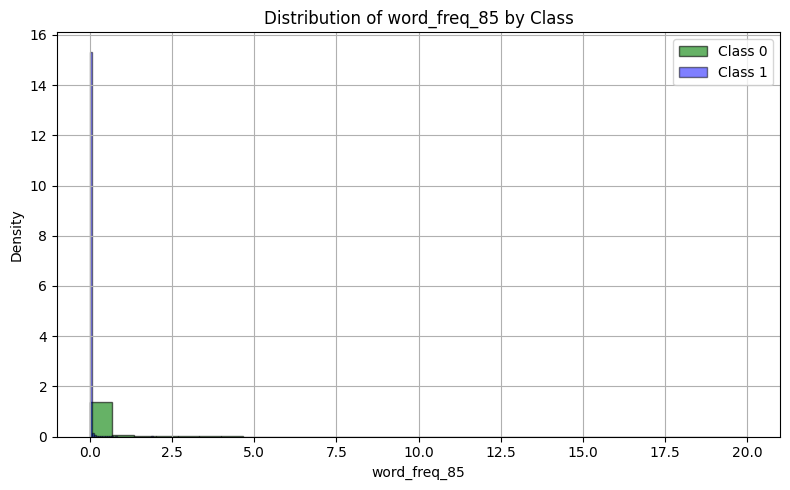

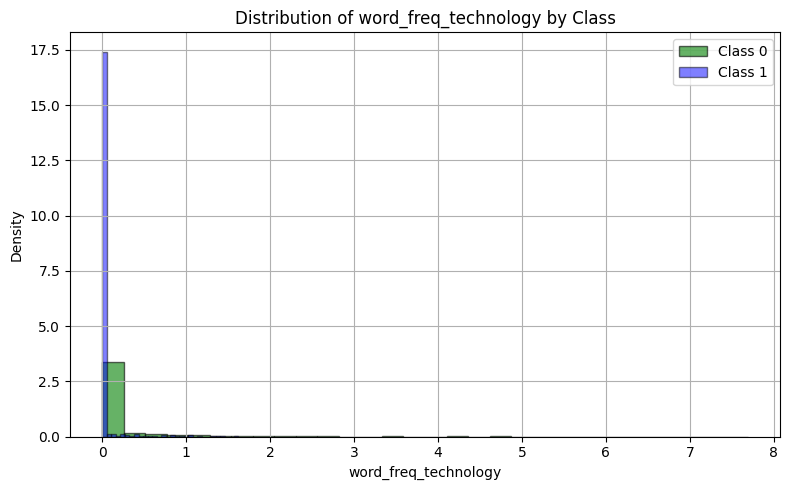

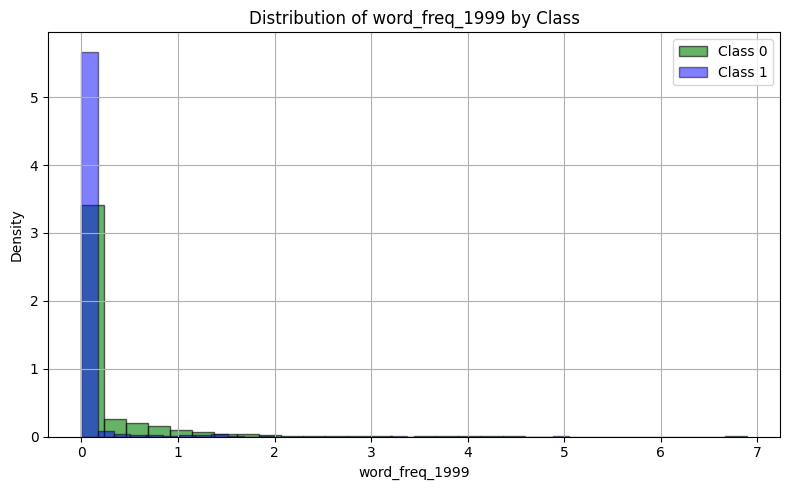

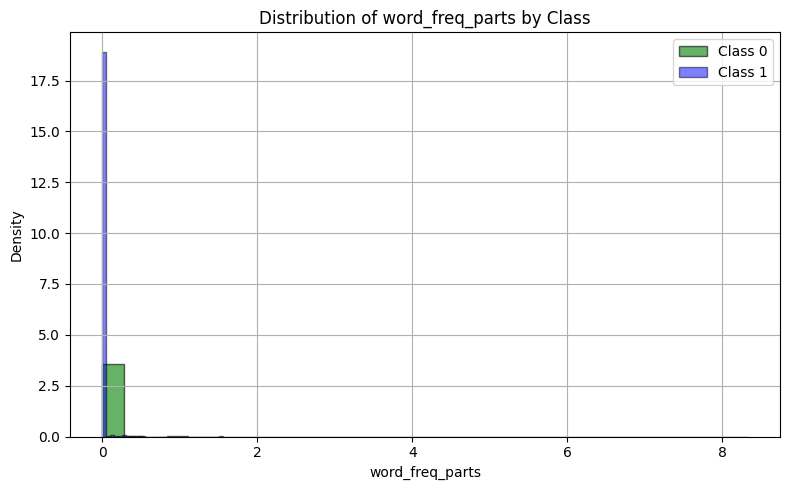

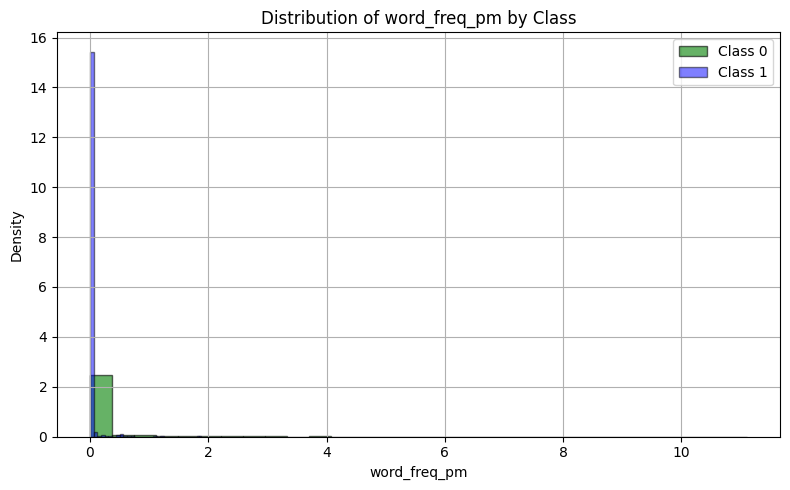

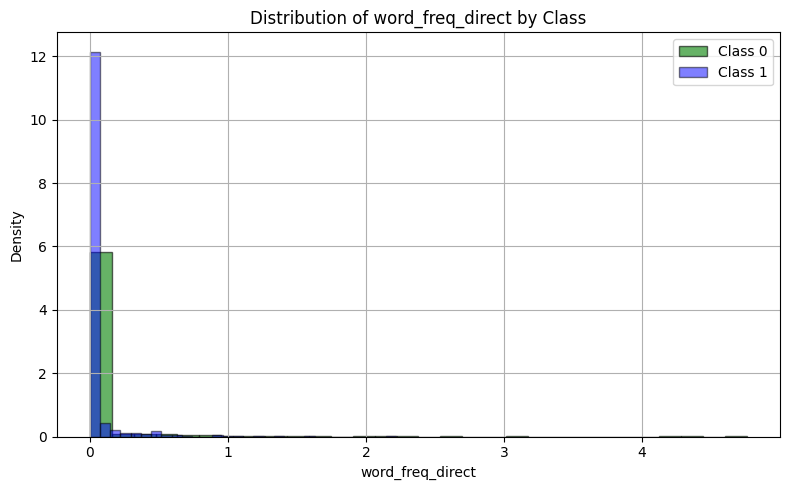

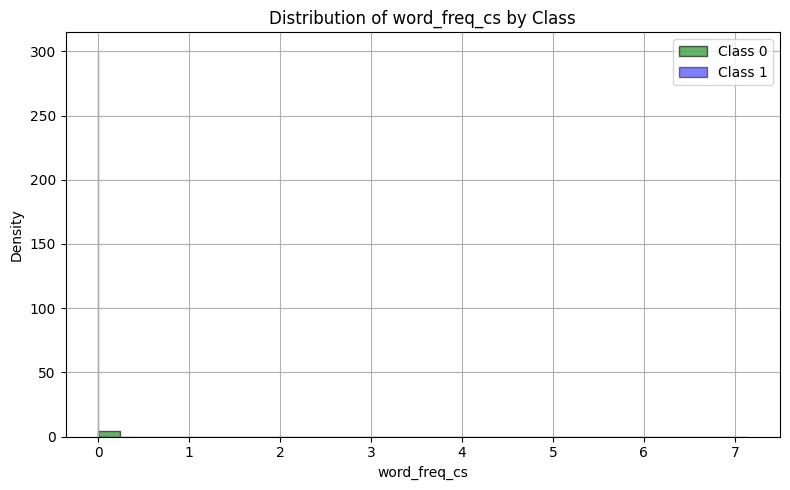

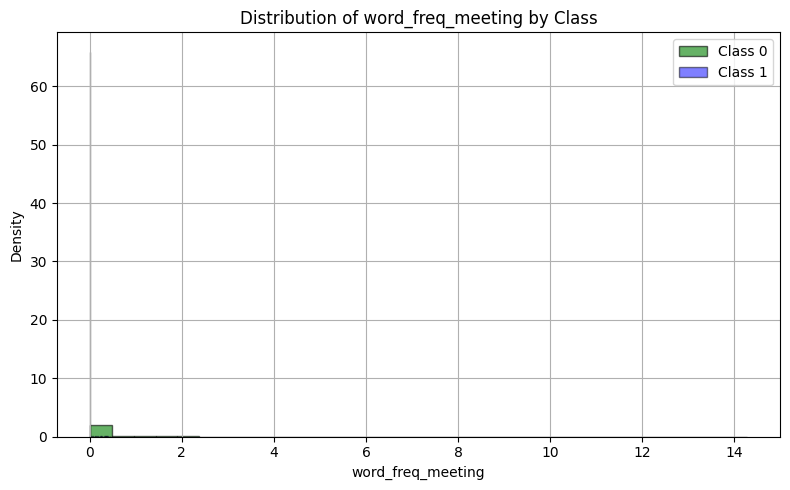

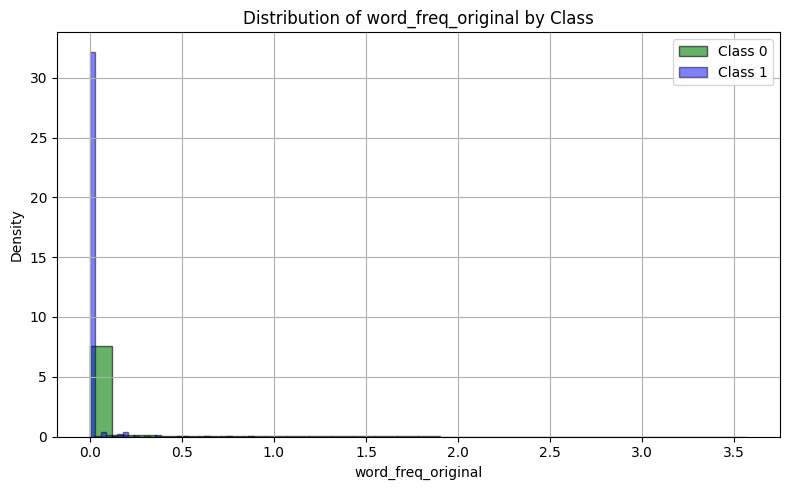

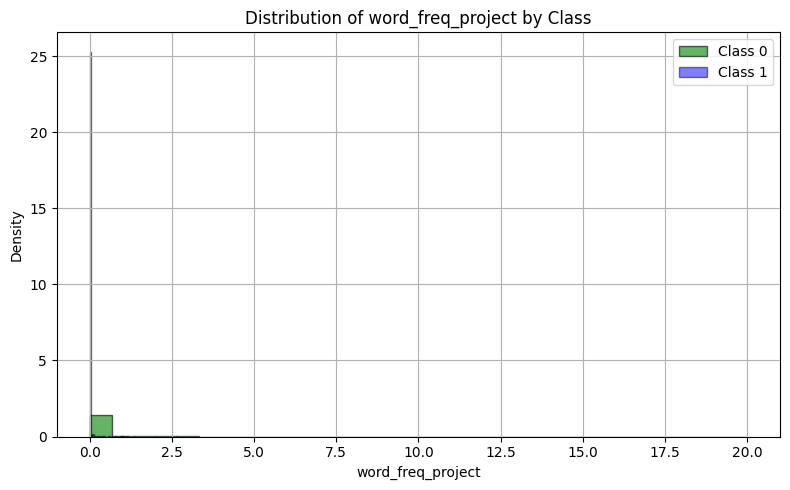

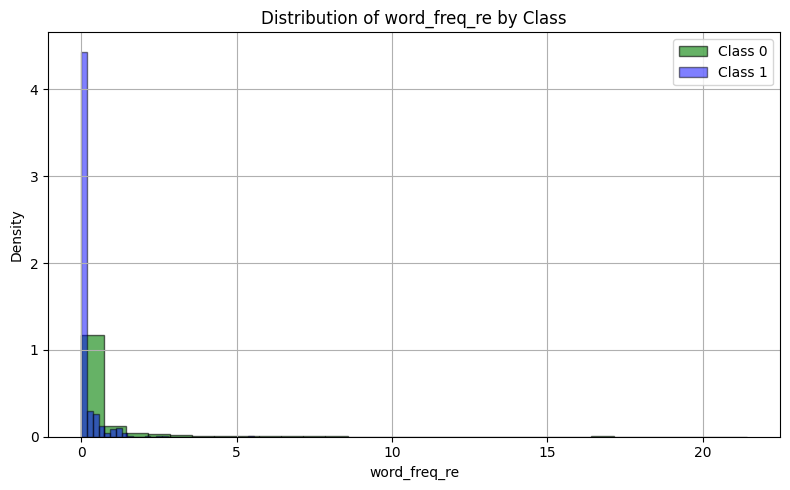

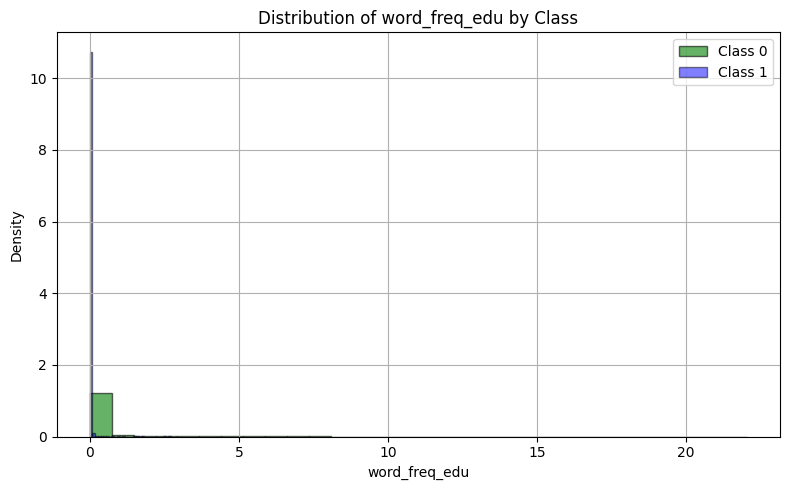

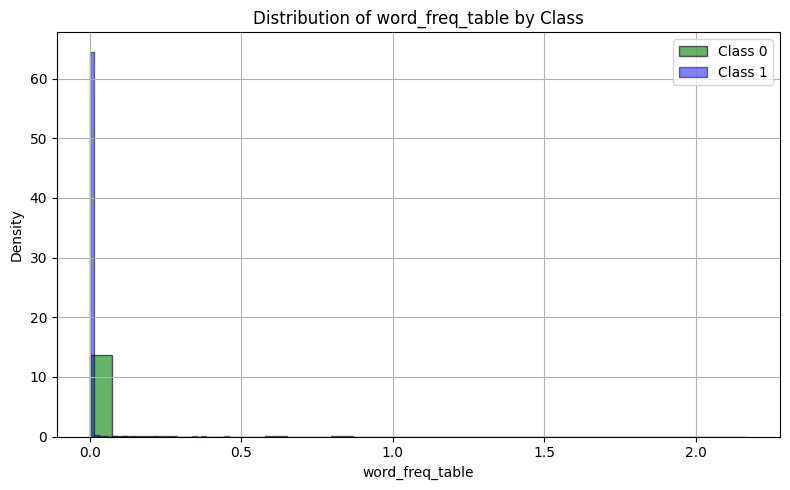

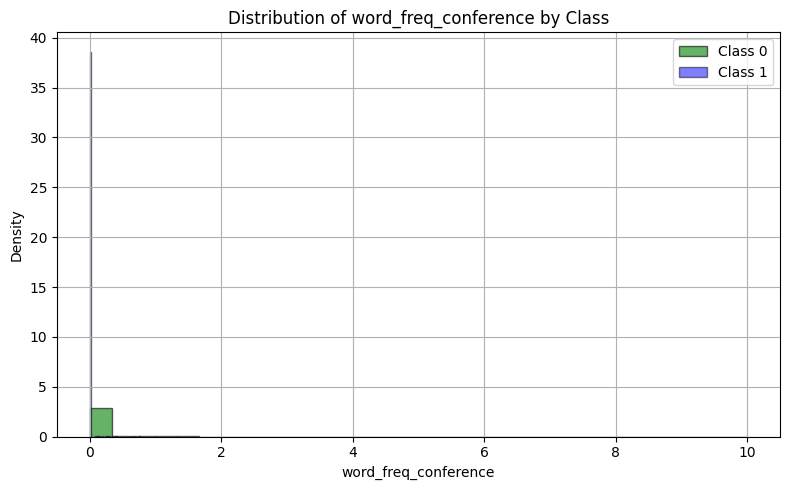

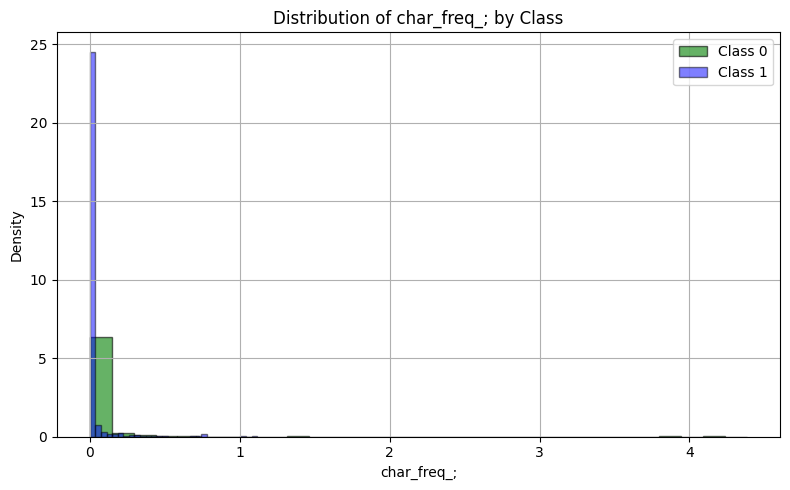

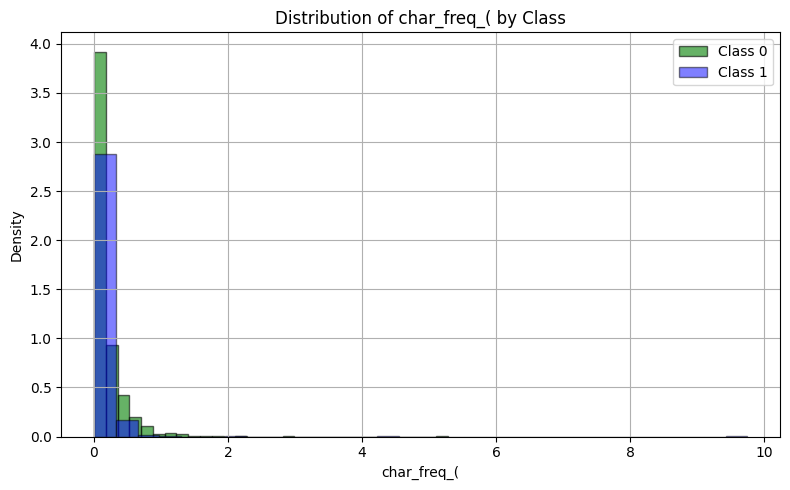

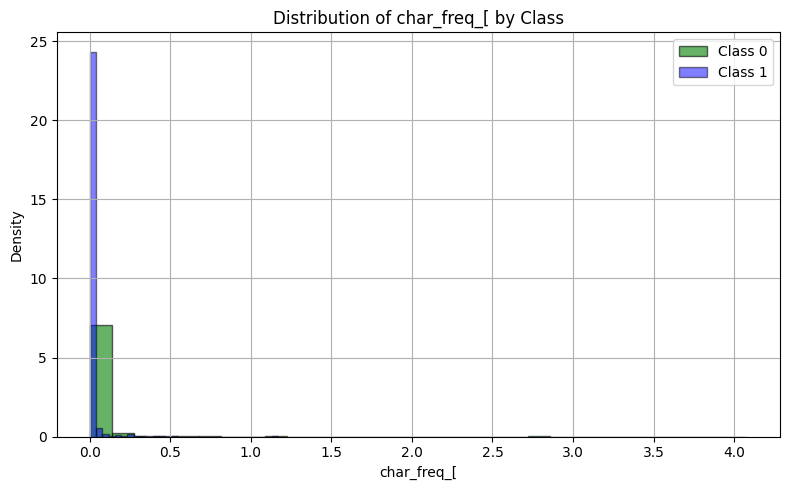

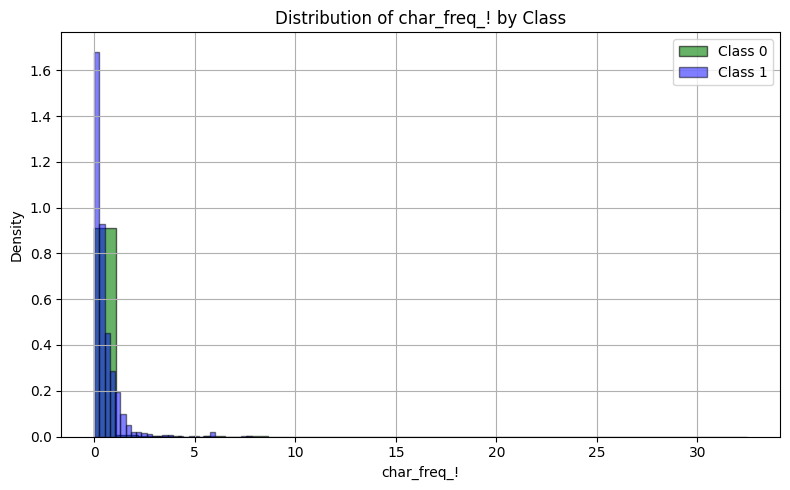

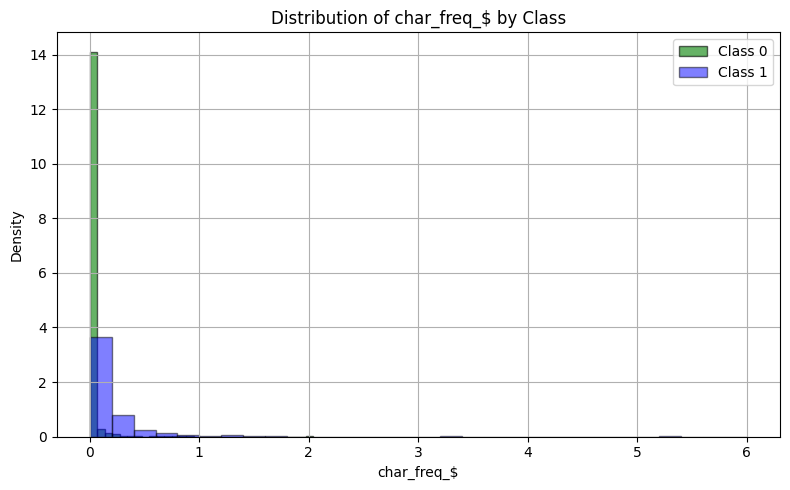

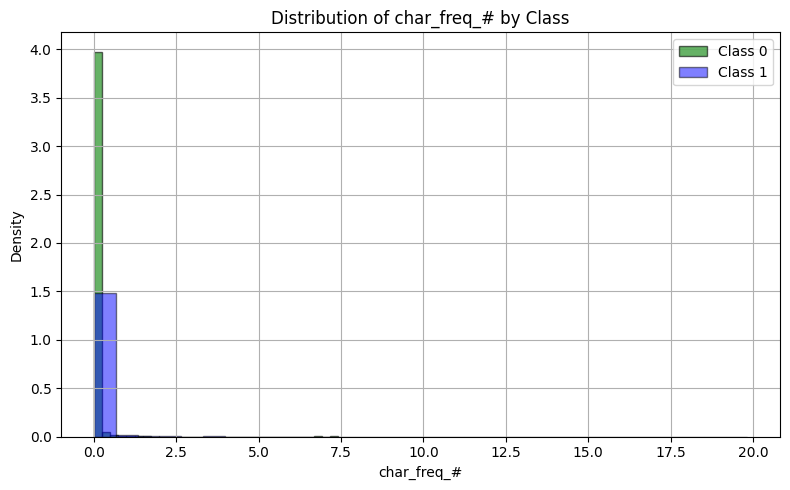

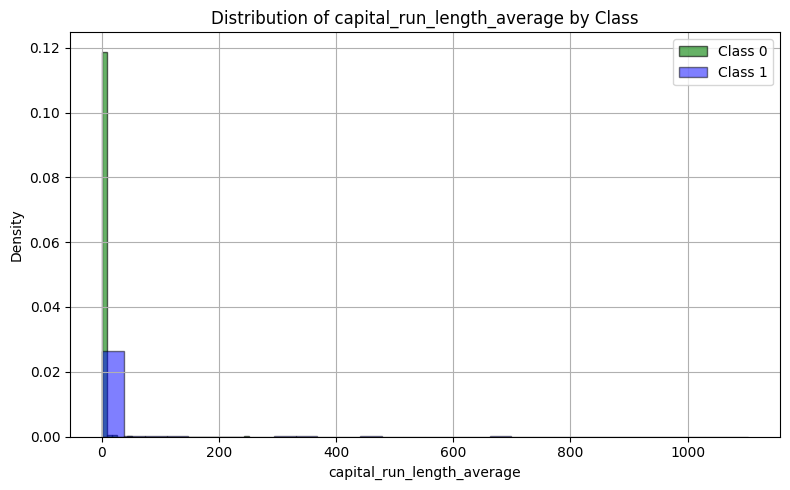

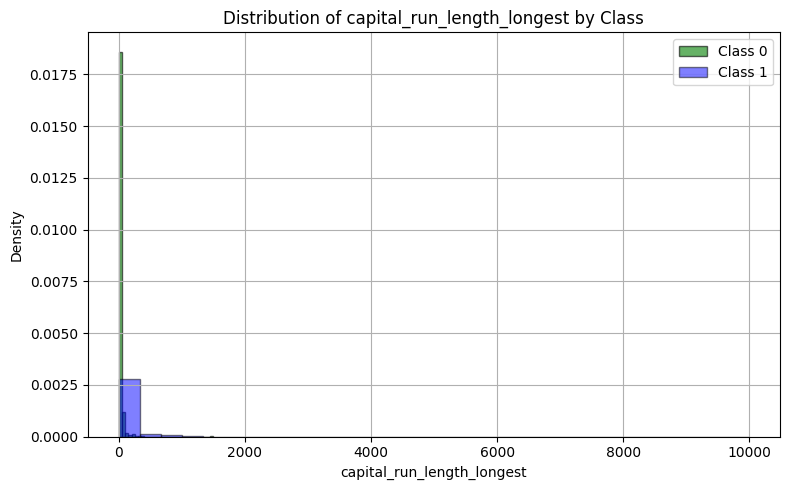

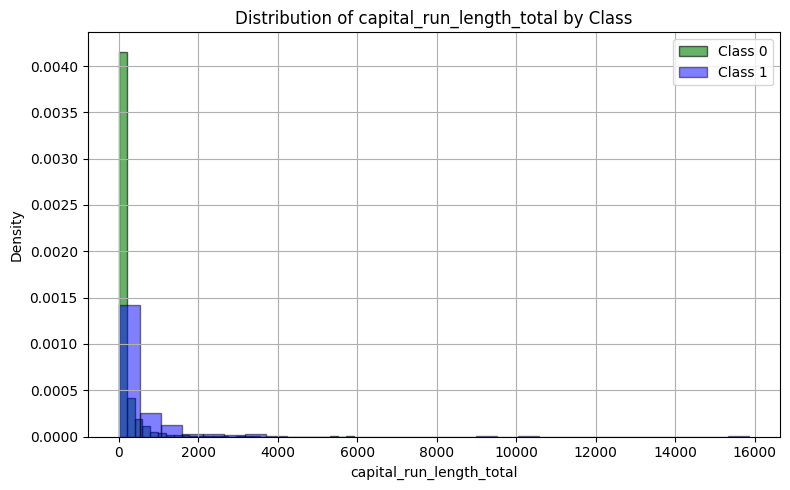

In [ ]:

for label in cols[:-1]:  # Assuming last column is 'class'
    plt.figure(figsize=(8, 5))

    plt.hist(df[df['class'] == 0][label], bins=30, color='green', label='Class 0', alpha=0.6, density=True, edgecolor='black')
    plt.hist(df[df['class'] == 1][label], bins=30, color='blue', label='Class 1', alpha=0.5, density=True, edgecolor='black')

    plt.title(f'Distribution of {label} by Class')
    plt.xlabel(label)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Statistical Analysis for Feature Selection

1. ANOVA F-test (for numeric features & categorical class)

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X= df.drop('class',axis=1)
Y=df['class']
f_vals, p_vals= f_classif(X,Y)

# Show top related features
for feature,score,p in sorted(zip(X.columns,f_vals,p_vals), key= lambda x: x[1], reverse=True):
  print(f'{feature}: F={score:2f}, P={p:4f}')

word_freq_your: F=791.726012, P=0.000000
word_freq_000: F=580.534452, P=0.000000
word_freq_remove: F=570.169634, P=0.000000
char_freq_$: F=538.029935, P=0.000000
word_freq_you: F=372.273985, P=0.000000
word_freq_free: F=342.346240, P=0.000000
word_freq_business: F=342.316290, P=0.000000
word_freq_hp: F=324.490814, P=0.000000
capital_run_length_total: F=304.417709, P=0.000000
word_freq_our: F=285.890659, P=0.000000
char_freq_!: F=285.810155, P=0.000000
word_freq_receive: F=267.687159, P=0.000000
word_freq_hpl: F=263.930408, P=0.000000
word_freq_over: F=263.060625, P=0.000000
word_freq_order: F=260.549947, P=0.000000
word_freq_money: F=225.314579, P=0.000000
capital_run_length_longest: F=225.283327, P=0.000000
word_freq_internet: F=205.486673, P=0.000000
word_freq_email: F=200.128275, P=0.000000
word_freq_all: F=185.665407, P=0.000000
word_freq_addresses: F=183.543361, P=0.000000
word_freq_credit: F=171.792881, P=0.000000
word_freq_george: F=160.081358, P=0.000000
word_freq_1999: F=150.5

Result:
Which Features Should be Used?
- High F-scores, e.g., > 100
- Very low p-values, e.g., < 0.01

2.  Mutual Information (captures nonlinear relationships too)

In [ ]:
mi = mutual_info_classif(X,Y)
for feature, score in sorted(zip(X.columns,mi),key=lambda x: x[1],reverse=True):
  print(f'{feature}: MI={score:4f}')

char_freq_!: MI=0.204180
capital_run_length_longest: MI=0.191811
char_freq_$: MI=0.177454
capital_run_length_average: MI=0.173006
word_freq_your: MI=0.155598
word_freq_free: MI=0.144810
word_freq_remove: MI=0.140698
capital_run_length_total: MI=0.134150
word_freq_000: MI=0.115469
word_freq_money: MI=0.114873
word_freq_you: MI=0.109234
word_freq_hp: MI=0.103623
word_freq_george: MI=0.095979
word_freq_hpl: MI=0.083149
word_freq_our: MI=0.079167
word_freq_internet: MI=0.075314
word_freq_all: MI=0.073432
word_freq_business: MI=0.073145
word_freq_over: MI=0.065816
word_freq_receive: MI=0.065606
word_freq_address: MI=0.065552
word_freq_credit: MI=0.059841
word_freq_mail: MI=0.055063
word_freq_1999: MI=0.052231
word_freq_edu: MI=0.050561
word_freq_email: MI=0.049086
char_freq_(: MI=0.048391
word_freq_order: MI=0.046391
word_freq_re: MI=0.046242
word_freq_addresses: MI=0.045341
word_freq_make: MI=0.044678
word_freq_85: MI=0.043900
word_freq_will: MI=0.043141
word_freq_lab: MI=0.042900
char_fre

MI measures the dependency between a feature and the target.

If MI = 0: No relationship at all.

If MI > 0: Some dependency exists. The higher the MI, the more informative the feature is for predicting the class.

MI can detect non-linear relationships, unlike correlation or even ANOVA.

Programtically feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector= SelectKBest(mutual_info_classif,k=20) # k is the number of best features to select
X_new= selector.fit_transform(X,Y)
selected_features= X.columns[selector.get_support()]
print(selected_features)

Index(['word_freq_address', 'word_freq_all', 'word_freq_our',
       'word_freq_remove', 'word_freq_internet', 'word_freq_receive',
       'word_freq_free', 'word_freq_business', 'word_freq_you',
       'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'char_freq_!', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


In [ ]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
# dfa= df[selected_features]+ df['class']
# df['class']+df[selected_features]
df = pd.concat([df[selected_features],df['class']],axis=1)
df

,word_freq_address,word_freq_all,word_freq_our,word_freq_remove,word_freq_internet,word_freq_receive,word_freq_free,word_freq_business,word_freq_you,word_freq_your,...,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,char_freq_!,char_freq_$,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.64,0.64,0.32,0.00,0.00,0.00,0.32,0.00,1.93,0.96,...,0.00,0.0,0.0,0.0,0.778,0.000,3.756,61,278,1
1,0.28,0.50,0.14,0.21,0.07,0.21,0.14,0.07,3.47,1.59,...,0.43,0.0,0.0,0.0,0.372,0.180,5.114,101,1028,1
2,0.00,0.71,1.23,0.19,0.12,0.38,0.06,0.06,1.36,0.51,...,0.06,0.0,0.0,0.0,0.276,0.184,9.821,485,2259,1
3,0.00,0.00,0.63,0.31,0.63,0.31,0.31,0.00,3.18,0.31,...,0.00,0.0,0.0,0.0,0.137,0.000,3.537,40,191,1
4,0.00,0.00,0.63,0.31,0.63,0.31,0.31,0.00,3.18,0.31,...,0.00,0.0,0.0,0.0,0.135,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.62,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,...,0.00,0.0,0.0,0.0,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,2.00,...,0.00,0.0,0.0,0.0,0.353,0.000,1.555,4,14,0
4598,0.00,0.30,0.00,0.00,0.00,0.00,0.00,0.00,1.50,0.30,...,0.00,0.0,0.0,0.0,0.000,0.000,1.404,6,118,0
4599,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,1.93,0.32,...,0.00,0.0,0.0,0.0,0.000,0.000,1.147,5,78,0


In [ ]:
df.isnull().sum()

,0
word_freq_address,0
word_freq_all,0
word_freq_our,0
word_freq_remove,0
word_freq_internet,0
word_freq_receive,0
word_freq_free,0
word_freq_business,0
word_freq_you,0
word_freq_your,0


In [ ]:
train, valid, test= np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

train

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,word_freq_address,word_freq_all,word_freq_our,word_freq_remove,word_freq_internet,word_freq_receive,word_freq_free,word_freq_business,word_freq_you,word_freq_your,...,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,char_freq_!,char_freq_$,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
2201,0.00,1.47,0.00,0.0,0.00,0.00,0.00,0.00,3.67,0.73,...,0.00,1.47,0.73,0.73,0.000,0.000,2.171,12,76,0
1523,0.21,0.56,0.28,0.0,0.28,0.42,1.12,0.70,2.24,0.98,...,0.70,0.00,0.00,0.00,0.768,0.312,3.401,94,966,1
4290,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,4.76,0.00,...,0.00,0.00,0.00,0.00,0.000,0.000,1.571,3,11,0
3339,0.13,0.55,0.27,0.0,0.00,0.00,0.13,0.00,1.94,0.97,...,0.00,0.13,1.11,0.00,0.025,0.000,5.695,82,598,0
3215,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,5.55,0.00,...,0.00,0.00,0.00,0.00,0.000,0.000,1.000,1,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4563,0.00,0.54,0.54,0.0,0.00,0.00,0.00,0.00,4.39,1.64,...,0.00,0.00,0.00,0.00,0.000,0.000,1.512,11,59,0
2980,0.00,0.25,0.00,0.0,0.00,0.00,0.00,0.00,4.02,4.02,...,0.00,0.75,0.75,0.00,0.000,0.000,4.446,29,209,0
1128,0.00,0.48,0.72,0.0,0.00,0.48,0.48,0.00,1.20,1.44,...,0.24,0.00,0.00,0.00,0.036,0.184,2.336,66,264,1
1172,0.00,0.00,1.35,0.0,0.00,0.00,0.45,0.45,1.80,1.35,...,0.00,0.00,0.00,0.00,0.138,0.000,5.809,46,122,1


In [ ]:
def scale_dataset(dataframe,oversample=False):
  X= dataframe[dataframe.columns[:-1]].values
  y= dataframe[dataframe.columns[-1]].values

  scaler= StandardScaler()
  X=scaler.fit_transform(X)
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data= np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y


In [ ]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

1091
1669


In [ ]:
train,x_train,y_train= scale_dataset(train,oversample=True)
valid,x_valid,y_valid= scale_dataset(valid,oversample=False)
test,x_test,y_test= scale_dataset(test,oversample=False)

In [ ]:
from sklearn.svm import SVC

model_input=['word_freq_address', 'word_freq_all', 'word_freq_our',
       'word_freq_remove', 'word_freq_internet', 'word_freq_receive',
       'word_freq_free', 'word_freq_business', 'word_freq_you',
       'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
       'word_freq_hpl', 'word_freq_george', 'char_freq_!', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total']

In [ ]:
model= SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
predict_svm= model.predict(x_test)

In [ ]:
print(classification_report(y_test,predict_svm))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       573
           1       0.87      0.89      0.88       348

    accuracy                           0.91       921
   macro avg       0.90      0.90      0.90       921
weighted avg       0.91      0.91      0.91       921



In [ ]:
valid_prediction=model.predict(x_valid)
print(classification_report(y_valid,valid_prediction))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       546
           1       0.88      0.86      0.87       374

    accuracy                           0.90       920
   macro avg       0.89      0.89      0.89       920
weighted avg       0.90      0.90      0.90       920



In [ ]:
train_acc = model.score(x_train, y_train)
test_acc = model.score(x_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 0.9343918514080287
Testing Accuracy: 0.9055374592833876


- Training Accuracy: 0.9343918514080287
- Testing Accuracy: 0.9055374592833876

The gap between training and testing accuracy is small (~2.9% difference).

This suggests that your model is not overfitting — it's generalizing quite well.


# Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(20,)),                       # Assuming 20 features
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.02),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.02),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.02),

    tf.keras.layers.Dense(1, activation='sigmoid')     # Binary classification
])

nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
early_stopping= EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history= nn_model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=0
    )

In [ ]:
prediction=nn_model.predict(x_test)
y_pred_classes = (prediction > 0.5).astype(int)
y_pred_classes

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [ ]:


print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_classes))


Accuracy: 0.8371335504885994
Confusion Matrix:
 [[462 111]
 [ 39 309]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       573
           1       0.74      0.89      0.80       348

    accuracy                           0.84       921
   macro avg       0.83      0.85      0.83       921
weighted avg       0.85      0.84      0.84       921



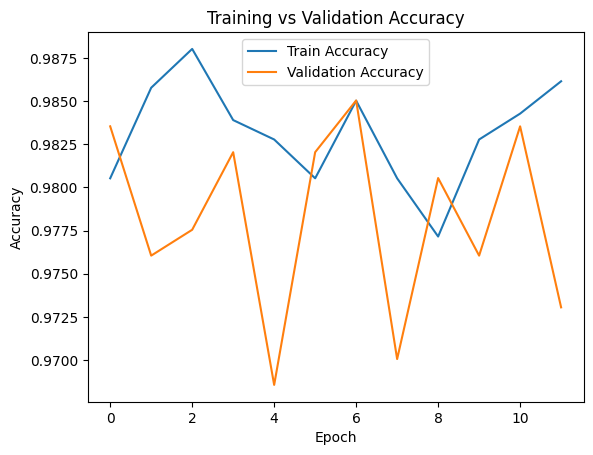

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()